In [31]:
import networkx as nx
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import sys
import matplotlib.pyplot as plt

In [32]:
stocks = pd.read_csv(r'C:\Users\HP PC\Untitled Folder 1\HW1_asset_prices.csv', index_col = 'Date', parse_dates=True)
stocks

,EOD~BND.11,EOD~DBC.11,EOD~DIA.11,EOD~EEM.11,EOD~EFA.11,EOD~EMB.11,EOD~EPP.11,EOD~EWG.11,EOD~EWI.11,EOD~EWJ.11,...,EOD~VGK.11,EOD~VPL.11,EOD~VXX.11,EOD~XLB.11,EOD~XLE.11,EOD~XLF.11,EOD~XLK.11,EOD~XLU.11,EOD~CSJ.11,EOD~FXF.11
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-08,81.830000,16.40,235.460000,46.780000,69.870000,114.600000,47.690000,33.180000,30.950000,60.020000,...,58.200000,72.770000,33.530,58.700000,69.820000,26.250000,64.010000,55.700000,104.960000,94.5100
2017-11-07,81.890000,16.43,235.420000,46.560000,69.640000,114.650000,47.220000,33.070000,31.090000,59.650000,...,58.170000,72.200000,33.520,58.640000,70.160000,26.380000,63.660000,55.660000,105.010000,94.5400
2017-11-06,81.860000,16.53,235.410000,46.860000,69.900000,115.260000,47.200000,33.340000,31.220000,59.180000,...,58.670000,71.980000,33.340,58.580000,70.250000,26.750000,63.630000,55.000000,105.000000,94.7500
2017-11-03,81.800000,16.22,235.180000,46.340000,69.800000,115.420000,47.090000,33.390000,31.220000,59.190000,...,58.580000,71.880000,33.660,58.830000,68.680000,26.780000,63.490000,55.210000,105.000000,94.4400
2017-11-02,81.730000,16.12,234.960000,46.580000,69.910000,116.150000,47.310000,33.500000,31.430000,59.050000,...,58.690000,71.890000,33.710,58.860000,68.480000,26.890000,62.990000,55.010000,105.040000,94.6299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-11-07,73.140921,25.09,141.937366,38.180859,57.814507,90.897669,41.842232,26.097397,26.970685,43.885035,...,48.829656,54.682027,812.800,40.019240,76.699945,15.427367,31.276707,33.970233,100.211497,107.0100
2013-11-06,72.996641,25.27,143.185067,38.884312,58.741822,91.113717,42.427379,26.385766,27.998998,44.696323,...,49.611734,55.674441,785.024,40.554306,77.900630,15.601431,31.690999,34.292350,100.125960,107.5000
2013-11-05,72.870396,25.25,141.973795,38.763985,58.229124,91.180193,42.164487,26.187512,27.692308,44.115214,...,49.144235,55.160190,798.080,40.277548,77.671285,15.529535,31.374461,33.830940,100.125960,107.3000


In [36]:
stocks.head()

,EOD~BND.11,EOD~DBC.11,EOD~DIA.11,EOD~EEM.11,EOD~EFA.11,EOD~EMB.11,EOD~EPP.11,EOD~EWG.11,EOD~EWI.11,EOD~EWJ.11,...,EOD~VGK.11,EOD~VPL.11,EOD~VXX.11,EOD~XLB.11,EOD~XLE.11,EOD~XLF.11,EOD~XLK.11,EOD~XLU.11,EOD~CSJ.11,EOD~FXF.11
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-08,81.83,16.40,235.46,46.78,69.87,114.60,47.69,33.18,30.95,60.02,...,58.20,72.77,33.53,58.70,69.82,26.25,64.01,55.70,104.96,94.5100
2017-11-07,81.89,16.43,235.42,46.56,69.64,114.65,47.22,33.07,31.09,59.65,...,58.17,72.20,33.52,58.64,70.16,26.38,63.66,55.66,105.01,94.5400
2017-11-06,81.86,16.53,235.41,46.86,69.90,115.26,47.20,33.34,31.22,59.18,...,58.67,71.98,33.34,58.58,70.25,26.75,63.63,55.00,105.00,94.7500
2017-11-03,81.80,16.22,235.18,46.34,69.80,115.42,47.09,33.39,31.22,59.19,...,58.58,71.88,33.66,58.83,68.68,26.78,63.49,55.21,105.00,94.4400
2017-11-02,81.73,16.12,234.96,46.58,69.91,116.15,47.31,33.50,31.43,59.05,...,58.69,71.89,33.71,58.86,68.48,26.89,62.99,55.01,105.04,94.6299


In [37]:
stocks.describe()

,EOD~BND.11,EOD~DBC.11,EOD~DIA.11,EOD~EEM.11,EOD~EFA.11,EOD~EMB.11,EOD~EPP.11,EOD~EWG.11,EOD~EWI.11,EOD~EWJ.11,...,EOD~VGK.11,EOD~VPL.11,EOD~VXX.11,EOD~XLB.11,EOD~XLE.11,EOD~XLF.11,EOD~XLK.11,EOD~XLU.11,EOD~CSJ.11,EOD~FXF.11
count,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,...,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000
mean,77.974888,17.979760,174.165434,37.507753,59.369726,101.979912,40.614202,26.692533,26.700033,47.679233,...,50.013331,57.420193,327.341525,46.676902,70.579540,19.553785,43.020125,43.492776,102.338001,100.952529
std,2.626157,4.549718,22.562915,3.935746,4.007440,7.224907,3.443176,2.422598,3.329047,3.816193,...,3.715211,4.733818,214.915662,4.540824,8.967495,2.837551,7.568000,5.922877,1.490958,5.161562
min,72.469761,11.880000,140.541121,27.582919,49.029274,89.086197,31.670751,21.390008,19.579474,40.221723,...,41.319321,47.203655,33.340000,36.057049,49.210749,15.427367,31.276707,32.655650,100.078440,92.650000
25%,76.282418,14.780000,157.080090,34.825116,56.611342,97.219561,38.727178,24.849548,23.711187,44.767632,...,47.255413,54.177030,125.880000,43.704505,64.495886,17.567838,38.022326,38.980798,100.988487,97.200000
50%,77.814818,15.620000,168.643128,37.699549,58.946901,98.850273,40.620476,26.614666,27.268071,46.964318,...,49.554935,56.502198,310.880000,46.217807,68.733952,18.789559,41.061492,41.871921,101.810899,99.320000
75%,80.189245,21.970000,180.984488,40.012533,61.536785,109.137858,43.152308,28.002857,29.186510,50.068553,...,52.418864,59.215001,464.480000,48.703166,76.604564,19.847661,46.782531,48.044450,103.748160,104.460100
max,82.326046,26.920000,235.460000,46.860000,69.910000,116.357001,47.690000,33.500000,33.482597,60.020000,...,58.870000,72.770000,861.920000,59.430000,92.393778,26.890000,64.010000,55.700000,105.260234,113.830000


In [38]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1013 entries, 2017-11-08 to 2013-11-01
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   EOD~BND.11  1013 non-null   float64
 1   EOD~DBC.11  1013 non-null   float64
 2   EOD~DIA.11  1013 non-null   float64
 3   EOD~EEM.11  1013 non-null   float64
 4   EOD~EFA.11  1013 non-null   float64
 5   EOD~EMB.11  1013 non-null   float64
 6   EOD~EPP.11  1013 non-null   float64
 7   EOD~EWG.11  1013 non-null   float64
 8   EOD~EWI.11  1013 non-null   float64
 9   EOD~EWJ.11  1013 non-null   float64
 10  EOD~EWQ.11  1013 non-null   float64
 11  EOD~EWU.11  1013 non-null   float64
 12  EOD~FXB.11  1013 non-null   float64
 13  EOD~FXC.11  1013 non-null   float64
 14  EOD~FXE.11  1013 non-null   float64
 15  EOD~FXI.11  1013 non-null   float64
 16  EOD~FXY.11  1013 non-null   float64
 17  EOD~GDX.11  1013 non-null   float64
 18  EOD~GLD.11  1013 non-null   float64
 19  EOD~IEF.1

In [41]:
cor_matrix = stocks.corr()
cor_matrix

,EOD~BND.11,EOD~DBC.11,EOD~DIA.11,EOD~EEM.11,EOD~EFA.11,EOD~EMB.11,EOD~EPP.11,EOD~EWG.11,EOD~EWI.11,EOD~EWJ.11,...,EOD~VGK.11,EOD~VPL.11,EOD~VXX.11,EOD~XLB.11,EOD~XLE.11,EOD~XLF.11,EOD~XLK.11,EOD~XLU.11,EOD~CSJ.11,EOD~FXF.11
EOD~BND.11,1.000000,-0.822062,0.794479,0.069905,0.114368,0.912854,0.119582,0.099310,-0.482615,0.638039,...,-0.037230,0.536324,-0.900317,0.597031,-0.613705,0.689425,0.845532,0.941027,0.934951,-0.769985
EOD~DBC.11,-0.822062,1.000000,-0.574282,0.349666,0.200079,-0.600426,0.325952,0.228763,0.600429,-0.472528,...,0.333239,-0.215966,0.773717,-0.238640,0.895370,-0.509694,-0.644009,-0.717165,-0.713552,0.870505
EOD~DIA.11,0.794479,-0.574282,1.000000,0.468724,0.563945,0.917934,0.519725,0.568437,-0.070294,0.897045,...,0.412195,0.875397,-0.883305,0.898652,-0.346392,0.975872,0.988677,0.910599,0.917660,-0.657030
EOD~EEM.11,0.069905,0.349666,0.468724,1.000000,0.906563,0.383581,0.968244,0.871560,0.609441,0.553773,...,0.872187,0.788827,-0.162012,0.743330,0.522937,0.488016,0.403966,0.239615,0.227668,0.224999
EOD~EFA.11,0.114368,0.200079,0.563945,0.906563,1.000000,0.412868,0.881808,0.961832,0.722791,0.701312,...,0.975473,0.852729,-0.274274,0.759922,0.333035,0.596364,0.504831,0.291689,0.308123,0.135446
EOD~EMB.11,0.912854,-0.600426,0.917934,0.383581,0.412868,1.000000,0.449375,0.408301,-0.245520,0.785165,...,0.257371,0.776831,-0.917891,0.815172,-0.346823,0.842485,0.939693,0.947970,0.968140,-0.655235
EOD~EPP.11,0.119582,0.325952,0.519725,0.968244,0.881808,0.449375,1.000000,0.859786,0.533985,0.559117,...,0.831654,0.806764,-0.229427,0.790734,0.529161,0.540090,0.449015,0.305822,0.293515,0.170135
EOD~EWG.11,0.099310,0.228763,0.568437,0.871560,0.961832,0.408301,0.859786,1.000000,0.670526,0.664514,...,0.943557,0.830771,-0.232118,0.742909,0.318852,0.593605,0.502004,0.297612,0.325287,0.151760
EOD~EWI.11,-0.482615,0.600429,-0.070294,0.609441,0.722791,-0.245520,0.533985,0.670526,1.000000,0.120915,...,0.834734,0.285055,0.339941,0.172235,0.536058,0.011219,-0.128671,-0.333470,-0.332439,0.588681
EOD~EWJ.11,0.638039,-0.472528,0.897045,0.553773,0.701312,0.785165,0.559117,0.664514,0.120915,1.000000,...,0.548281,0.933750,-0.799630,0.838301,-0.249518,0.898535,0.885168,0.713208,0.773878,-0.522373


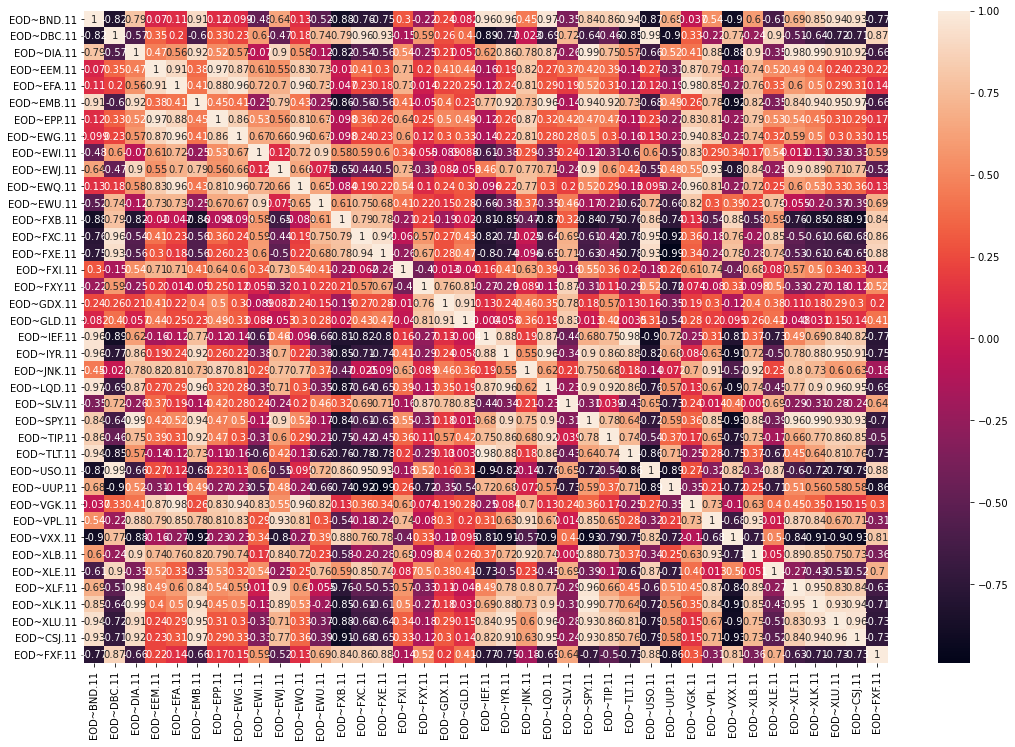

In [40]:
plt.figure(figsize=(18,12))
sns.heatmap(cor_matrix, annot = True)
plt.show()

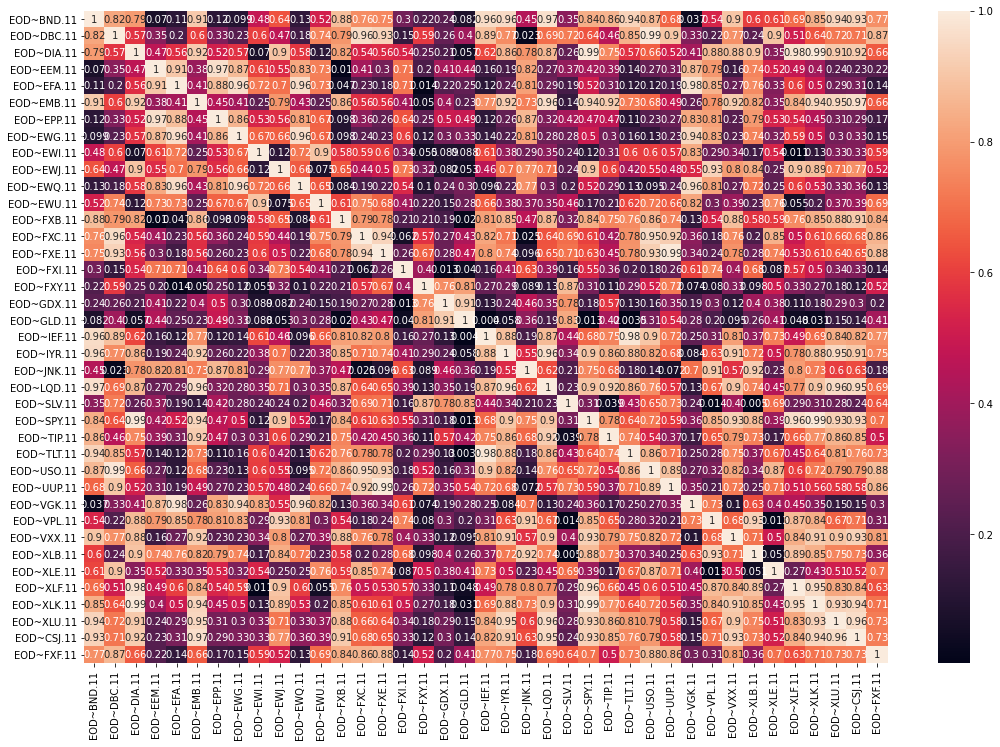

In [42]:
plt.figure(figsize=(18,12))

high_cor_matrix = stocks.corr().abs()

sns.heatmap(high_cor_matrix, annot = True)

plt.show()

In [43]:
stocks = cor_matrix.index.values

In [45]:
cor_matrix = np.asmatrix(cor_matrix)

In [46]:
G = nx.from_numpy_matrix(cor_matrix)

In [47]:
G = nx.relabel_nodes(G, lambda x: stocks[x])

In [48]:
G.edges(data=True)

EdgeDataView([('EOD~BND.11', 'EOD~BND.11', {'weight': 1.0}), ('EOD~BND.11', 'EOD~DBC.11', {'weight': -0.8220619436026615}), ('EOD~BND.11', 'EOD~DIA.11', {'weight': 0.7944792033336234}), ('EOD~BND.11', 'EOD~EEM.11', {'weight': 0.06990468475524964}), ('EOD~BND.11', 'EOD~EFA.11', {'weight': 0.11436755413278887}), ('EOD~BND.11', 'EOD~EMB.11', {'weight': 0.9128536788357466}), ('EOD~BND.11', 'EOD~EPP.11', {'weight': 0.11958187104281387}), ('EOD~BND.11', 'EOD~EWG.11', {'weight': 0.09931047806248296}), ('EOD~BND.11', 'EOD~EWI.11', {'weight': -0.4826149429941241}), ('EOD~BND.11', 'EOD~EWJ.11', {'weight': 0.6380390720471758}), ('EOD~BND.11', 'EOD~EWQ.11', {'weight': 0.1332984860397909}), ('EOD~BND.11', 'EOD~EWU.11', {'weight': -0.5175970947436056}), ('EOD~BND.11', 'EOD~FXB.11', {'weight': -0.8817178954853515}), ('EOD~BND.11', 'EOD~FXC.11', {'weight': -0.7642072305344217}), ('EOD~BND.11', 'EOD~FXE.11', {'weight': -0.7516055475963472}), ('EOD~BND.11', 'EOD~FXI.11', {'weight': 0.2970784882291008}),

In [52]:
def create_corr_network_5(G, corr_direction, min_correlation):
    H = G.copy()
    
    for stock1, stock2, weight in G.edges_iter(data=True):
        
        if corr_direction == "positive":
            
            if weight["weight"] < 0 or weight["weight"] < min_correlation:
                H.remove_edge(stock1, stock2)
        else:
            
            if weight["weight"] >= 0 or weight["weight"] > min_correlation:
                H.remove_edge(stock1, stock2)
                
                
                
    edges, weights = zip(*nx.get_edge_attributes(H, 'weight').items())

    weights = tuple([(1+abs(x))**2 for x in weights])

    d = nx.degree(H)

    nodelist, node_sizes = zip(*d.items())

    positions = nx.circular_layout(H)

    plt.figure(figsize=(15,15))

    nx.draw_networkx_labels(H, positions, font_size=8, font_family='sans-serif')
    
    if corr_direction == "positive":
        edge_colour = plt.cm.GnBu
    else:
        edge_colour = plt.cm.PuRd
    
    
    nx.draw_networkx_edges(H, positions, edge_list=edges, style='solid', width=weights, edge_color = weights, edge_cmap = edge_colour, edge_vmin = min(weights), edge_vmax=max(weights))
    
    plt.axis('off')
    
    plt.savefig("part5" + corr_direction + ".png", format="PNG")
    
    plt.show()
